# Data Cleaning and Preprocessing

In [1]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

import warnings
warnings.simplefilter(action='ignore')

%matplotlib inline

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
from wordcloud import WordCloud, STOPWORDS

In [4]:
#load the datasets
df_yoga=pd.read_csv('data/yoga.csv')
df_med=pd.read_csv('data/med.csv')

In [5]:
df_yoga.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,...,gallery_data,is_gallery,media_metadata,crosspost_parent,crosspost_parent_list,author_flair_template_id,author_cakeday,edited,banned_by,created
0,[],False,shibahuskymom,NaN,[],NaN,text,t2_2kjzb7tv,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-31 07:55:04
1,[],False,fdrecordings,NaN,[],NaN,text,t2_8lmsmdn3,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-31 07:49:45
2,[],False,fdrecordings,NaN,[],NaN,text,t2_8lmsmdn3,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-31 07:49:26
3,[],False,meggriffinsglasses,NaN,[],NaN,text,t2_dbgfda3k,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-31 06:33:38
4,[],False,Friendly_Popo,NaN,[],NaN,text,t2_kjpgn,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-31 04:53:59


In [6]:
df_yoga.columns

Index(['all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext', 'author_flair_text',
       'author_flair_type', 'author_fullname', 'author_is_blocked',
       'author_patreon_flair', 'author_premium', 'awarders', 'can_mod_post',
       'contest_mode', 'created_utc', 'domain', 'full_link', 'gildings', 'id',
       'is_created_from_ads_ui', 'is_crosspostable', 'is_meta',
       'is_original_content', 'is_reddit_media_domain', 'is_robot_indexable',
       'is_self', 'is_video', 'link_flair_background_color',
       'link_flair_richtext', 'link_flair_text_color', 'link_flair_type',
       'locked', 'media_only', 'no_follow', 'num_comments', 'num_crossposts',
       'over_18', 'parent_whitelist_status', 'permalink', 'pinned',
       'post_hint', 'preview', 'pwls', 'removed_by_category', 'retrieved_on',
       'score', 'selftext', 'send_replies', 'spoiler', 'stickied', 'subreddit',
       'subreddit_id', 'subreddit_subscribers', 'subreddit_

In [7]:
columns_to_keep=['subreddit','is_self','is_video','selftext','title','subreddit_id','created_utc','author','upvote_ratio','num_comments']
yoga=df_yoga[columns_to_keep]
med=df_med[columns_to_keep]

In [8]:
yoga.head()

,subreddit,is_self,is_video,selftext,title,subreddit_id,created_utc,author,upvote_ratio,num_comments
0,yoga,False,False,NaN,[COMP] 2021 was a great year for my shoulder m...,t5_2qhq6,1640908504,shibahuskymom,1.0,0
1,yoga,False,False,NaN,Tenqz - Deep Meditation [Ambient] (DJ Mix 2021...,t5_2qhq6,1640908185,fdrecordings,1.0,0
2,yoga,False,False,NaN,Tenqz - Deep Meditation [Ambient] (DJ Mix 2021...,t5_2qhq6,1640908166,fdrecordings,1.0,0
3,yoga,True,False,I am super out of shape so I am 90% sure that ...,Extremely sore after my first hot vinyasa class,t5_2qhq6,1640903618,meggriffinsglasses,1.0,0
4,yoga,True,False,"Hello yogis,\n\nAnybody aware of interesting y...",Online new year's offerings?,t5_2qhq6,1640897639,Friendly_Popo,1.0,0


### Drop duplicates

In [9]:
yoga.drop_duplicates(keep='first', inplace=True)

In [10]:
yoga.shape

(1500, 10)

In [11]:
med.drop_duplicates(keep='first', inplace=True)

In [12]:
med.shape

(1500, 10)

### Drop null values

In [13]:
yoga.isnull().sum()

subreddit         0
is_self           0
is_video          0
selftext        589
title             0
subreddit_id      0
created_utc       0
author            0
upvote_ratio      0
num_comments      0
dtype: int64

In [14]:
med.isnull().sum()

subreddit         0
is_self           0
is_video          0
selftext        234
title             0
subreddit_id      0
created_utc       0
author            0
upvote_ratio      0
num_comments      0
dtype: int64

In [15]:
yoga.dropna(inplace=True)

In [16]:
med.dropna(inplace=True)

In [17]:
yoga.isnull().sum()

subreddit       0
is_self         0
is_video        0
selftext        0
title           0
subreddit_id    0
created_utc     0
author          0
upvote_ratio    0
num_comments    0
dtype: int64

In [18]:
med.isnull().sum()

subreddit       0
is_self         0
is_video        0
selftext        0
title           0
subreddit_id    0
created_utc     0
author          0
upvote_ratio    0
num_comments    0
dtype: int64

In [19]:
yoga.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 911 entries, 3 to 1499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   subreddit     911 non-null    object 
 1   is_self       911 non-null    bool   
 2   is_video      911 non-null    bool   
 3   selftext      911 non-null    object 
 4   title         911 non-null    object 
 5   subreddit_id  911 non-null    object 
 6   created_utc   911 non-null    int64  
 7   author        911 non-null    object 
 8   upvote_ratio  911 non-null    float64
 9   num_comments  911 non-null    int64  
dtypes: bool(2), float64(1), int64(2), object(5)
memory usage: 65.8+ KB


In [20]:
med.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1266 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   subreddit     1266 non-null   object 
 1   is_self       1266 non-null   bool   
 2   is_video      1266 non-null   bool   
 3   selftext      1266 non-null   object 
 4   title         1266 non-null   object 
 5   subreddit_id  1266 non-null   object 
 6   created_utc   1266 non-null   int64  
 7   author        1266 non-null   object 
 8   upvote_ratio  1266 non-null   float64
 9   num_comments  1266 non-null   int64  
dtypes: bool(2), float64(1), int64(2), object(5)
memory usage: 91.5+ KB


### Drop non-text posts

In [21]:
#is_self documentation states that if true, the submission is a selfpost (text-only)
yoga[yoga['is_self']==False][:5]

,subreddit,is_self,is_video,selftext,title,subreddit_id,created_utc,author,upvote_ratio,num_comments
608,yoga,False,False,[deleted],#bringmeyoga #shoulderstretch #upperbodystreng...,t5_2qhq6,1638973742,[deleted],1.0,0
624,yoga,False,False,[deleted],Learnt a new variation of Halasana! Knees rest...,t5_2qhq6,1638917794,[deleted],1.0,4
625,yoga,False,False,[deleted],Wheel pose on toes,t5_2qhq6,1638917483,[deleted],1.0,0
630,yoga,False,False,[deleted],"[COMP] Standing king pigeon attempt. So close,...",t5_2qhq6,1638910462,[deleted],1.0,0
642,yoga,False,False,[deleted],[COMP] Sirsasana B,t5_2qhq6,1638892161,[deleted],1.0,0


In [22]:
#keeping the original copy for EDA
ori_yoga=yoga
ori_med=med

In [23]:
#filter only posts with text only
yoga=yoga[yoga['is_self']==True]

In [24]:
med=med[med['is_self']==True]

### Drop removed posts by author

In [25]:
#quite a number of selftect were removed.we will omit these.
yoga['selftext'][1493]

'[removed]'

In [26]:
yoga=yoga[yoga['selftext']!='[removed]']

In [27]:
med=med[med['selftext']!='[removed]']

In [28]:
# Default value of display.max_rows is 10 so at max
# 10 rows will be printed. Set it None to display
# all rows in the dataframe
pd.set_option('display.max_rows', None)

In [29]:
yoga.head()

,subreddit,is_self,is_video,selftext,title,subreddit_id,created_utc,author,upvote_ratio,num_comments
3,yoga,True,False,I am super out of shape so I am 90% sure that ...,Extremely sore after my first hot vinyasa class,t5_2qhq6,1640903618,meggriffinsglasses,1.0,0
4,yoga,True,False,"Hello yogis,\n\nAnybody aware of interesting y...",Online new year's offerings?,t5_2qhq6,1640897639,Friendly_Popo,1.0,0
6,yoga,True,False,Hi all. \n\nI was diagnosed with COVID last we...,Yoga with COVID,t5_2qhq6,1640895222,dreamingofcupcakes,1.0,0
10,yoga,True,False,I just came from a 75 minute class and I was s...,My heart is so full.,t5_2qhq6,1640885021,nachosmmm,1.0,0
11,yoga,True,False,"Okay, Down Dog app finally beat me. :)\n\nTran...",Down Dog app - Star to Side Lunge,t5_2qhq6,1640878105,dave0814,1.0,0


#### Drop characters and raw text from posts using redditcleaner

source: https://github.com/LoLei/redditcleaner

In [110]:
pip install redditcleaner

Note: you may need to restart the kernel to use updated packages.


In [31]:
import redditcleaner

In [32]:
yoga['selftext'] = yoga['selftext'].map(redditcleaner.clean)

In [33]:
med['selftext'] = med['selftext'].map(redditcleaner.clean)

In [34]:
yoga.head()

,subreddit,is_self,is_video,selftext,title,subreddit_id,created_utc,author,upvote_ratio,num_comments
3,yoga,True,False,I am super out of shape so I am 90% sure that ...,Extremely sore after my first hot vinyasa class,t5_2qhq6,1640903618,meggriffinsglasses,1.0,0
4,yoga,True,False,"Hello yogis, Anybody aware of interesting yoga...",Online new year's offerings?,t5_2qhq6,1640897639,Friendly_Popo,1.0,0
6,yoga,True,False,Hi all. I was diagnosed with COVID last week a...,Yoga with COVID,t5_2qhq6,1640895222,dreamingofcupcakes,1.0,0
10,yoga,True,False,I just came from a 75 minute class and I was s...,My heart is so full.,t5_2qhq6,1640885021,nachosmmm,1.0,0
11,yoga,True,False,"Okay, Down Dog app finally beat me. :) Transit...",Down Dog app - Star to Side Lunge,t5_2qhq6,1640878105,dave0814,1.0,0


In [35]:
yoga['selftext'][211]

'Hi yoga people, My girlfriend loves yoga &amp; I’ve been thinking about trying to get into it with her but as of now know nothing about it. I was doing some research into those cork yoga blocks that people seem to prefer to other materials, and I thought it would be cool to paint a pair of them. However, when I looked that up, it seems as though you have to treat the cork with something to cover/fill in the pores before painting it. My question is, will this somehow diminish the quality of the cork or make it more rigid / less usable in any way? Has anybody ever tried painting cork blocks?'

### Exploring Lemmatizer,Stemmer and stopwords

In [36]:
# Imports
import pandas as pd       
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer,WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import STOPWORDS
import re
from sklearn.metrics import accuracy_score


In [37]:
#exploring stop words, stemming, and lemmatization.

In [38]:
tokenizer = RegexpTokenizer(r'\w+')

In [39]:
stemmer = PorterStemmer()

def stemmer_text(text):
    return " ".join([stemmer.stem(w) for w in tokenizer.tokenize(text)])


In [40]:
yoga['selftext_stem'] =yoga['selftext'].apply(stemmer_text)

In [41]:
med['selftext_stem'] =med['selftext'].apply(stemmer_text)

In [42]:
yoga['title_stem'] =yoga['title'].apply(stemmer_text)

In [43]:
med['title_stem'] =med['title'].apply(stemmer_text)

In [44]:

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return " ".join([lemmatizer.lemmatize(w) for w in tokenizer.tokenize(text)])



In [45]:
yoga['selftext_lem'] =yoga['selftext'].apply(lemmatize_text)

In [46]:
med['selftext_lem'] =med['selftext'].apply(lemmatize_text)

In [47]:
yoga['title_lem'] =yoga['title'].apply(lemmatize_text)

In [48]:
med['title_lem'] =med['title'].apply(lemmatize_text)

In [49]:
yoga[['title','title_lem','title_stem']]

,title,title_lem,title_stem
3,Extremely sore after my first hot vinyasa class,Extremely sore after my first hot vinyasa class,extrem sore after my first hot vinyasa class
4,Online new year's offerings?,Online new year s offering,onlin new year s offer
6,Yoga with COVID,Yoga with COVID,yoga with covid
10,My heart is so full.,My heart is so full,my heart is so full
11,Down Dog app - Star to Side Lunge,Down Dog app Star to Side Lunge,down dog app star to side lung
13,Sacred cacao ceremony,Sacred cacao ceremony,sacr cacao ceremoni
15,Questions on getting started,Questions on getting started,question on get start
17,Men's Yoga Suggestions?,Men s Yoga Suggestions,men s yoga suggest
18,Results of yoga on your body/fitness level,Results of yoga on your body fitness level,result of yoga on your bodi fit level
19,Pelvic tilt and yoga practice.,Pelvic tilt and yoga practice,pelvic tilt and yoga practic


In [50]:
yoga.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 659 entries, 3 to 1499
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subreddit      659 non-null    object 
 1   is_self        659 non-null    bool   
 2   is_video       659 non-null    bool   
 3   selftext       659 non-null    object 
 4   title          659 non-null    object 
 5   subreddit_id   659 non-null    object 
 6   created_utc    659 non-null    int64  
 7   author         659 non-null    object 
 8   upvote_ratio   659 non-null    float64
 9   num_comments   659 non-null    int64  
 10  selftext_stem  659 non-null    object 
 11  title_stem     659 non-null    object 
 12  selftext_lem   659 non-null    object 
 13  title_lem      659 non-null    object 
dtypes: bool(2), float64(1), int64(2), object(9)
memory usage: 84.4+ KB


In [51]:
#From the comparison i can see that lemmetization had more meaningful words while stemmer caused a few words to be incomprehensive as it removes all the affix leaving base words which can be confusing to read.
# In this case I will use the lemmatized approach to clean my data.

In [52]:
#note that theres apostrophes in the text which causes the tokenizer to output letters such as s,I,m,. 
#Will explore using stopwords to remove these letters that dont add value to the this data exploration.


In [53]:
yoga['selftext_lem'][3].split(' ')

['I',
 'am',
 'super',
 'out',
 'of',
 'shape',
 'so',
 'I',
 'am',
 '90',
 'sure',
 'that',
 'is',
 'the',
 'issue',
 'but',
 'I',
 'wanted',
 'to',
 'know',
 'if',
 'this',
 'is',
 'normal',
 'for',
 'a',
 'person',
 'who',
 'ha',
 'never',
 'done',
 'yoga',
 'in',
 'their',
 'life',
 'I',
 'used',
 'the',
 'search',
 'bar',
 'but',
 'most',
 'of',
 'people',
 'who',
 'asked',
 'about',
 'muscle',
 'soreness',
 'stated',
 'that',
 'they',
 'had',
 'done',
 'yoga',
 'before',
 'and',
 'vinyasa',
 'made',
 'them',
 'feel',
 'sore',
 'for',
 'the',
 'first',
 'time',
 'I',
 'am',
 'a',
 'complete',
 'newbie',
 'to',
 'yoga',
 'I',
 'had',
 'a',
 'wonderful',
 'time',
 'and',
 'plan',
 'to',
 'go',
 'back',
 'in',
 'a',
 'few',
 'day',
 'but',
 'I',
 'just',
 'wanted',
 'to',
 'know',
 'if',
 'this',
 'is',
 'something',
 'I',
 'should',
 'be',
 'concerned',
 'about',
 'While',
 'I',
 'wa',
 'doing',
 'the',
 'pose',
 'I',
 'felt',
 'fine',
 'Of',
 'course',
 'I',
 'wasn',
 't',
 'able',

In [54]:
stop_words = stopwords.words('english')


In [55]:
#adding up all the stopwords from my customized list, wordcloud, nltk and sklearn
customized_stopwords=['yoga','meditation','ha','lol','wa'] + list(STOPWORDS) + list(stop_words) + list(ENGLISH_STOP_WORDS)

In [56]:
yoga['selftext_lem_stop'] = yoga['selftext_lem'].apply(lambda x: " ".join([word for word in x.split(' ') if word not in customized_stopwords]))

In [57]:
med['selftext_lem_stop'] = med['selftext_lem'].apply(lambda x: " ".join([word for word in x.split(' ') if word not in customized_stopwords]))

In [58]:
yoga['title_lem_stop'] = yoga['title_lem'].apply(lambda x: " ".join([word for word in x.split(' ') if word not in customized_stopwords]))

In [59]:
med['title_lem_stop'] = med['title_lem'].apply(lambda x: " ".join([word for word in x.split(' ') if word not in customized_stopwords]))

In [60]:
yoga.head()

,subreddit,is_self,is_video,selftext,title,subreddit_id,created_utc,author,upvote_ratio,num_comments,selftext_stem,title_stem,selftext_lem,title_lem,selftext_lem_stop,title_lem_stop
3,yoga,True,False,I am super out of shape so I am 90% sure that ...,Extremely sore after my first hot vinyasa class,t5_2qhq6,1640903618,meggriffinsglasses,1.0,0,i am super out of shape so i am 90 sure that i...,extrem sore after my first hot vinyasa class,I am super out of shape so I am 90 sure that i...,Extremely sore after my first hot vinyasa class,I super shape I 90 sure issue I wanted know no...,Extremely sore hot vinyasa class
4,yoga,True,False,"Hello yogis, Anybody aware of interesting yoga...",Online new year's offerings?,t5_2qhq6,1640897639,Friendly_Popo,1.0,0,hello yogi anybodi awar of interest yoga offer...,onlin new year s offer,Hello yogi Anybody aware of interesting yoga o...,Online new year s offering,Hello yogi Anybody aware interesting offering ...,Online new year offering
6,yoga,True,False,Hi all. I was diagnosed with COVID last week a...,Yoga with COVID,t5_2qhq6,1640895222,dreamingofcupcakes,1.0,0,hi all i wa diagnos with covid last week and i...,yoga with covid,Hi all I wa diagnosed with COVID last week and...,Yoga with COVID,Hi I diagnosed COVID week really giving real b...,Yoga COVID
10,yoga,True,False,I just came from a 75 minute class and I was s...,My heart is so full.,t5_2qhq6,1640885021,nachosmmm,1.0,0,i just came from a 75 minut class and i wa sob...,my heart is so full,I just came from a 75 minute class and I wa so...,My heart is so full,I came 75 minute class I sobbing end This teac...,My heart
11,yoga,True,False,"Okay, Down Dog app finally beat me. :) Transit...",Down Dog app - Star to Side Lunge,t5_2qhq6,1640878105,dave0814,1.0,0,okay down dog app final beat me transit from s...,down dog app star to side lung,Okay Down Dog app finally beat me Transitionin...,Down Dog app Star to Side Lunge,Okay Down Dog app finally beat Transitioning S...,Down Dog app Star Side Lunge


In [61]:
med.head()

,subreddit,is_self,is_video,selftext,title,subreddit_id,created_utc,author,upvote_ratio,num_comments,selftext_stem,title_stem,selftext_lem,title_lem,selftext_lem_stop,title_lem_stop
0,Meditation,True,False,Now that I have burned all the past karma that...,Massive announcement concerning the future of ...,t5_2qnc9,1640907530,Extension_Mouse686,1.0,0,now that i have burn all the past karma that h...,massiv announc concern the futur of the human ...,Now that I have burned all the past karma that...,Massive announcement concerning the future of ...,Now I burned past karma weighing approximately...,Massive announcement concerning future human s...
3,Meditation,True,False,I have been meditating for 220 consecutive day...,Meditation Technique to deal with the first mi...,t5_2qnc9,1640903751,hartmanners,1.0,0,i have been medit for 220 consecut day today i...,medit techniqu to deal with the first minut wi...,I have been meditating for 220 consecutive day...,Meditation Technique to deal with the first mi...,I meditating 220 consecutive day today I usual...,Meditation Technique deal minute noisy mind
7,Meditation,True,False,I’ve tried to make meditation a part of my dai...,What should I focus on if I’m meditating witho...,t5_2qnc9,1640898514,v_philosoph,1.0,0,i ve tri to make medit a part of my daili habi...,what should i focu on if i m medit without a v...,I ve tried to make meditation a part of my dai...,What should I focus on if I m meditating witho...,I tried make daily habit stick I notice I use ...,What I focus I meditating video guide
9,Meditation,True,False,I have periods during the day where my mind is...,"Racing mind, adhd?",t5_2qnc9,1640896254,chris152772272727829,1.0,0,i have period dure the day where my mind is ra...,race mind adhd,I have period during the day where my mind is ...,Racing mind adhd,I period day mind racing thought Is adhd Think...,Racing mind adhd
10,Meditation,True,False,I think I’ve been meditating correctly for a w...,Is there such a thing as “spiritual meditation...,t5_2qnc9,1640895782,OkStep3679,1.0,0,i think i ve been medit correctli for a while ...,is there such a thing as spiritu medit vs just...,I think I ve been meditating correctly for a w...,Is there such a thing a spiritual meditation v...,I think I meditating correctly consistent I su...,Is thing spiritual v


In [62]:
yoga['selftext'][1259]

'When did you know you were ready to begin putting in your hours to be a RYT? Do you feel like you had a personal prerequisite? I know everyone is different, just looking to hear from people’s different personal experiences.'

Notice theres some slang words and acronyms on the text/title. So I did some digging and found that RYT is not content thats removed or anything, it stands for registered yoga teacher (RYT)

Source:
https://acronyms.thefreedictionary.com/RYT

In [63]:
#merge title and selftext
yoga['title_text_lem_stop']=yoga['title_lem_stop']+ ' ' +yoga['selftext_lem_stop']

In [64]:
med['title_text_lem_stop']=med['title_lem_stop']+ ' ' +med['selftext_lem_stop']

In [65]:
med['title_text_lem_stop'][3]

'Meditation Technique deal minute noisy mind I meditating 220 consecutive day today I usually follow breath time world struggle stress sickness thought spamming condition I 10 minute unpleasant demanding There lot turbulence day I cruise altitude Recently I came method lot trial error work really I want share hope useful It meant way quite mind pleasant state comfortably The method consists 1 inhaling focus peripheral awareness It feel muscle easily activate peripheral sens Recall feel standing maybe line supermarket Try recalling scan turning looking That muscle activated inhaling If visual sense recall look spot wall attention dot focusing It muscle peripheral awareness activate inhaling 2 exhaling focus attention Simply sensation exhaling Ideally strong focus point nostril breath leaf body Mix surroundings sound inhaling It good opportunity stay mental aware Let exhaling fall strong focus The peripheral muscle want work customize personal liking Wish peaceful'

In [66]:
yoga.head()

,subreddit,is_self,is_video,selftext,title,subreddit_id,created_utc,author,upvote_ratio,num_comments,selftext_stem,title_stem,selftext_lem,title_lem,selftext_lem_stop,title_lem_stop,title_text_lem_stop
3,yoga,True,False,I am super out of shape so I am 90% sure that ...,Extremely sore after my first hot vinyasa class,t5_2qhq6,1640903618,meggriffinsglasses,1.0,0,i am super out of shape so i am 90 sure that i...,extrem sore after my first hot vinyasa class,I am super out of shape so I am 90 sure that i...,Extremely sore after my first hot vinyasa class,I super shape I 90 sure issue I wanted know no...,Extremely sore hot vinyasa class,Extremely sore hot vinyasa class I super shape...
4,yoga,True,False,"Hello yogis, Anybody aware of interesting yoga...",Online new year's offerings?,t5_2qhq6,1640897639,Friendly_Popo,1.0,0,hello yogi anybodi awar of interest yoga offer...,onlin new year s offer,Hello yogi Anybody aware of interesting yoga o...,Online new year s offering,Hello yogi Anybody aware interesting offering ...,Online new year offering,Online new year offering Hello yogi Anybody aw...
6,yoga,True,False,Hi all. I was diagnosed with COVID last week a...,Yoga with COVID,t5_2qhq6,1640895222,dreamingofcupcakes,1.0,0,hi all i wa diagnos with covid last week and i...,yoga with covid,Hi all I wa diagnosed with COVID last week and...,Yoga with COVID,Hi I diagnosed COVID week really giving real b...,Yoga COVID,Yoga COVID Hi I diagnosed COVID week really gi...
10,yoga,True,False,I just came from a 75 minute class and I was s...,My heart is so full.,t5_2qhq6,1640885021,nachosmmm,1.0,0,i just came from a 75 minut class and i wa sob...,my heart is so full,I just came from a 75 minute class and I wa so...,My heart is so full,I came 75 minute class I sobbing end This teac...,My heart,My heart I came 75 minute class I sobbing end ...
11,yoga,True,False,"Okay, Down Dog app finally beat me. :) Transit...",Down Dog app - Star to Side Lunge,t5_2qhq6,1640878105,dave0814,1.0,0,okay down dog app final beat me transit from s...,down dog app star to side lung,Okay Down Dog app finally beat me Transitionin...,Down Dog app Star to Side Lunge,Okay Down Dog app finally beat Transitioning S...,Down Dog app Star Side Lunge,Down Dog app Star Side Lunge Okay Down Dog app...


In [67]:
med.head()

,subreddit,is_self,is_video,selftext,title,subreddit_id,created_utc,author,upvote_ratio,num_comments,selftext_stem,title_stem,selftext_lem,title_lem,selftext_lem_stop,title_lem_stop,title_text_lem_stop
0,Meditation,True,False,Now that I have burned all the past karma that...,Massive announcement concerning the future of ...,t5_2qnc9,1640907530,Extension_Mouse686,1.0,0,now that i have burn all the past karma that h...,massiv announc concern the futur of the human ...,Now that I have burned all the past karma that...,Massive announcement concerning the future of ...,Now I burned past karma weighing approximately...,Massive announcement concerning future human s...,Massive announcement concerning future human s...
3,Meditation,True,False,I have been meditating for 220 consecutive day...,Meditation Technique to deal with the first mi...,t5_2qnc9,1640903751,hartmanners,1.0,0,i have been medit for 220 consecut day today i...,medit techniqu to deal with the first minut wi...,I have been meditating for 220 consecutive day...,Meditation Technique to deal with the first mi...,I meditating 220 consecutive day today I usual...,Meditation Technique deal minute noisy mind,Meditation Technique deal minute noisy mind I ...
7,Meditation,True,False,I’ve tried to make meditation a part of my dai...,What should I focus on if I’m meditating witho...,t5_2qnc9,1640898514,v_philosoph,1.0,0,i ve tri to make medit a part of my daili habi...,what should i focu on if i m medit without a v...,I ve tried to make meditation a part of my dai...,What should I focus on if I m meditating witho...,I tried make daily habit stick I notice I use ...,What I focus I meditating video guide,What I focus I meditating video guide I tried ...
9,Meditation,True,False,I have periods during the day where my mind is...,"Racing mind, adhd?",t5_2qnc9,1640896254,chris152772272727829,1.0,0,i have period dure the day where my mind is ra...,race mind adhd,I have period during the day where my mind is ...,Racing mind adhd,I period day mind racing thought Is adhd Think...,Racing mind adhd,Racing mind adhd I period day mind racing thou...
10,Meditation,True,False,I think I’ve been meditating correctly for a w...,Is there such a thing as “spiritual meditation...,t5_2qnc9,1640895782,OkStep3679,1.0,0,i think i ve been medit correctli for a while ...,is there such a thing as spiritu medit vs just...,I think I ve been meditating correctly for a w...,Is there such a thing a spiritual meditation v...,I think I meditating correctly consistent I su...,Is thing spiritual v,Is thing spiritual v I think I meditating corr...


In [68]:
yoga.shape

(659, 17)

In [69]:
med.shape

(994, 17)

### Summary statistic

In [70]:
yoga['title_len']=[len(tokenizer.tokenize(r)) for r in yoga['title_lem_stop']]
yoga['selftext_len']=[len(tokenizer.tokenize(r)) for r in yoga['selftext_lem_stop']]

In [71]:
med['title_len']=[len(tokenizer.tokenize(r)) for r in med['title_lem_stop']]
med['selftext_len']=[len(tokenizer.tokenize(r)) for r in med['selftext_lem_stop']]

In [72]:
yoga.describe()

,created_utc,upvote_ratio,num_comments,title_len,selftext_len
count,6.590000e+02,659.000000,659.000000,659.000000,659.000000
mean,1.638645e+09,0.996920,10.182094,4.650986,49.396055
std,1.316097e+06,0.028807,21.043599,3.288491,56.216035
min,1.636284e+09,0.500000,0.000000,1.000000,1.000000
25%,1.637604e+09,1.000000,0.000000,3.000000,21.000000
50%,1.638698e+09,1.000000,2.000000,4.000000,36.000000
75%,1.639753e+09,1.000000,10.000000,6.000000,59.000000
max,1.640904e+09,1.000000,177.000000,29.000000,788.000000


In [73]:
med.describe()

,created_utc,upvote_ratio,num_comments,title_len,selftext_len
count,9.940000e+02,994.000000,994.000000,994.000000,994.000000
mean,1.639700e+09,0.993581,3.794769,4.872233,58.730382
std,7.164952e+05,0.046767,12.856405,3.431795,87.959948
min,1.638504e+09,0.440000,0.000000,1.000000,0.000000
25%,1.639052e+09,1.000000,0.000000,3.000000,18.000000
50%,1.639656e+09,1.000000,0.000000,4.000000,38.000000
75%,1.640338e+09,1.000000,1.000000,6.000000,70.000000
max,1.640908e+09,1.000000,153.000000,28.000000,1518.000000


Fom the summary statistics, we can see that both yoga and meditation has a high standard deviation for selftext length but its expected because different individuals express differently. It's also interesting to see some posts can go up to 1518 words in meditation posts which is very surprising. Our mean for number of comments for yoga is higher at about 10 which is higher than meditation at a mean of 2.

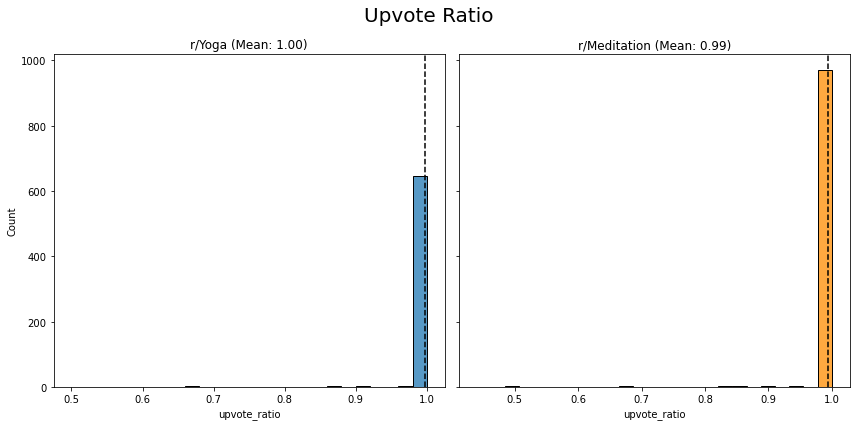

In [74]:
fig, ax = plt.subplots(1, 2, figsize=(12,6), sharey=True)
ax = ax.ravel()
mean_1 = yoga['upvote_ratio'].mean()
g1 = sns.histplot(data=yoga, x='upvote_ratio', ax = ax[0], bins=25)
g1.set_title(f'r/Yoga (Mean: {(mean_1):.2f})')
ax[0].axvline(mean_1, ls='--', color='black')
mean_2 = med['upvote_ratio'].mean()
g2 = sns.histplot(data=med, x='upvote_ratio', ax = ax[1], bins=25, color='darkorange')
g2.set_title(f'r/Meditation (Mean: {(mean_2):.2f})')
ax[1].axvline(mean_2, ls='--', color='black')
plt.suptitle('Upvote Ratio', fontsize=20)
plt.tight_layout()

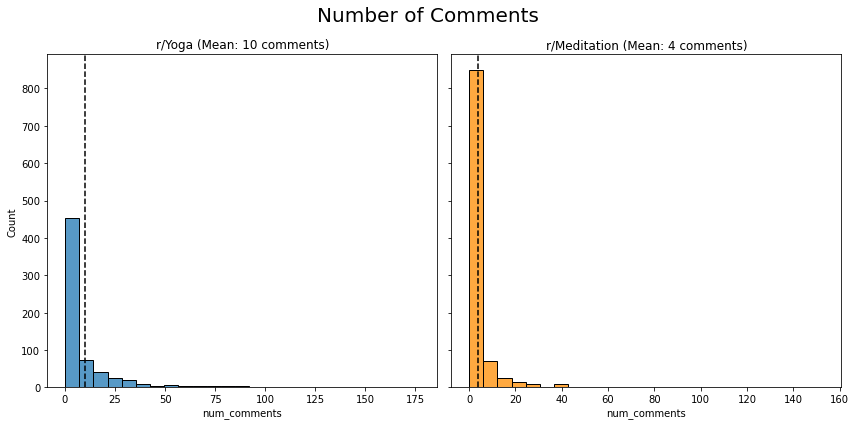

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(12,6), sharey=True)
ax = ax.ravel()
mean_1 = yoga['num_comments'].mean()
g1 = sns.histplot(data=yoga, x='num_comments', ax = ax[0], bins=25)
g1.set_title(f'r/Yoga (Mean: {round(mean_1)} comments)')
ax[0].axvline(mean_1, ls='--', color='black')
mean_2 = med['num_comments'].mean()
g2 = sns.histplot(data=med, x='num_comments', ax = ax[1], bins=25, color='darkorange')
g2.set_title(f'r/Meditation (Mean: {round(mean_2)} comments)')
ax[1].axvline(mean_2, ls='--', color='black')
plt.suptitle('Number of Comments', fontsize=20)
plt.tight_layout()

yoga has more comments than meditation subreddit posts which means more active users.

## EDA

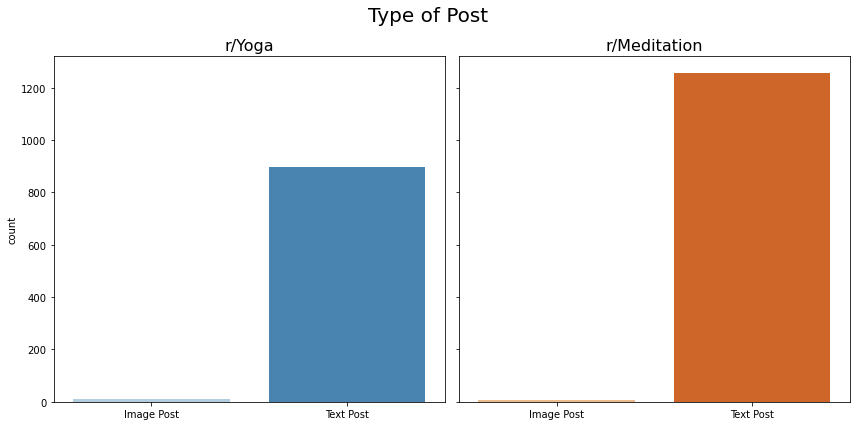

In [76]:
fig, ax = plt.subplots(1, 2, figsize=(12,6), sharey=True)
ax = ax.ravel()
g1 = sns.countplot(data=ori_yoga, x=ori_yoga['is_self'].astype(int), ax = ax[0], palette='Blues')
g1.set_xticklabels(['Image Post', 'Text Post'])
g1.set_title('r/Yoga', fontsize=16)
g1.set_xlabel('')
g2 = sns.countplot(data=ori_med, x=ori_med['is_self'].astype(int), ax = ax[1], palette='Oranges')
g2.set_xticklabels(['Image Post', 'Text Post'])
g2.set_title('r/Meditation', fontsize=16)
g2.set_ylabel('')
g2.set_xlabel('')
plt.suptitle('Type of Post', fontsize=20)
plt.tight_layout()

Most posts in  both yoga and meditation are text posts. We will remove those that are image posts for this study.


In [77]:
yoga['title_len'].mean()

4.650986342943854

In [78]:
med['title_len'].mean()

4.872233400402415

### Title and post length

In [79]:
def subplot_histograms(colname,colcount, graph_title):
    fig, ax = plt.subplots(1, 2, figsize=(12,6), sharey=True)
    ax = ax.ravel()
    
    # Plot first df   
    g1 = sns.histplot(data=yoga, x=colcount, ax = ax[0], bins=25)
    mean_1 = yoga[colcount].mean()
    ax[0].axvline(mean_1, ls='--', color='black')
    g1.set_title(f'r/Yoga (Mean: {round(mean_1)} words)')
    g1.set_xlabel(f'Length of {colname.capitalize()}')
    
    # Plot second df
    g2 = sns.histplot(data=med, x=colcount, ax = ax[1], bins=25, color='darkorange')
    mean_2 = med[colcount].mean()
    ax[1].axvline(mean_2, ls='--', color='black')
    g2.set_title(f'r/Meditation (Mean: {round(mean_2)} words)')
    g2.set_xlabel(f'Length of {colname.capitalize()}')
    plt.suptitle(graph_title, fontsize=20)
    plt.tight_layout()

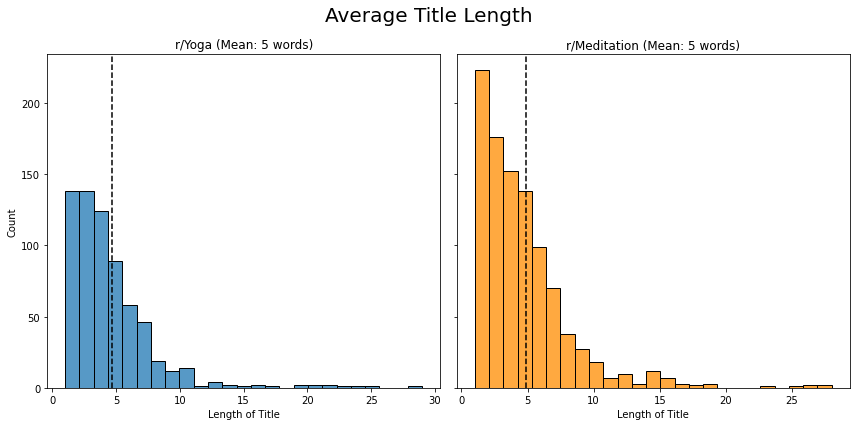

In [80]:
subplot_histograms(colname='title',colcount='title_len',graph_title='Average Title Length')

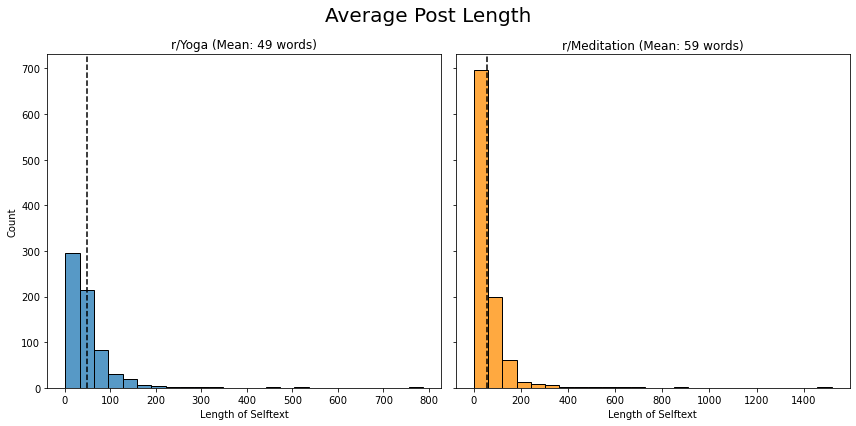

In [81]:
subplot_histograms('selftext','selftext_len','Average Post Length')

r/yoga generally has lower title and post lengths than r/Meditation. More of the features will most likely come from meditation for our classifier model.

### Top words by wordcloud

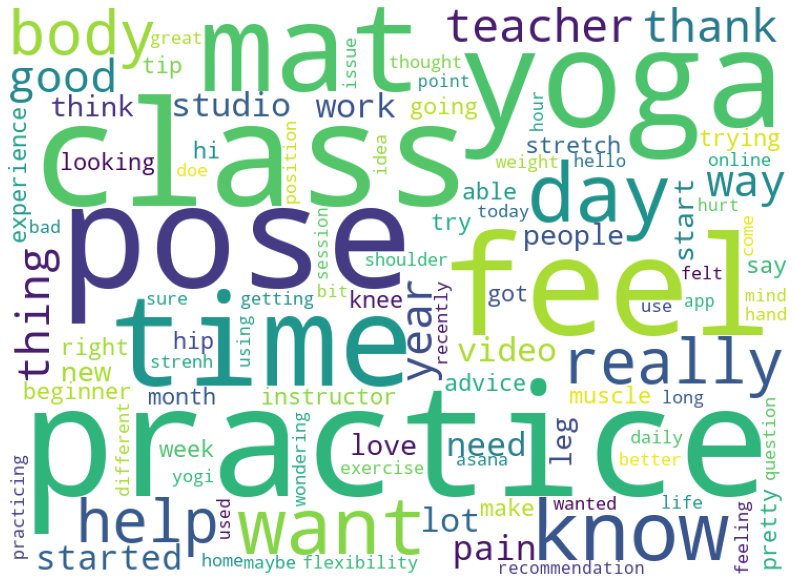

In [82]:
text = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for x in yoga.title_text_lem_stop: 
      
    # typecaste each val to string 
    x = str(x) 
  
    # split the value 
    values = x.split() 
      
    # Converts each token into lowercase 
    for i in range(len(values)): 
        values[i] = values[i].lower() 
          
    for words in values: 
        text = text + words + ' '
  
  
wc = WordCloud(max_words= 100,
                      width = 744, 
                      height = 544,
                      background_color ='white',
                      stopwords=stopwords, 
                      contour_width=3, 
                      contour_color='purple',
                      min_font_size = 10).generate(text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (14, 14)) 
plt.imshow(wc) 
plt.axis("off")
plt.savefig('resources/cloud.png')

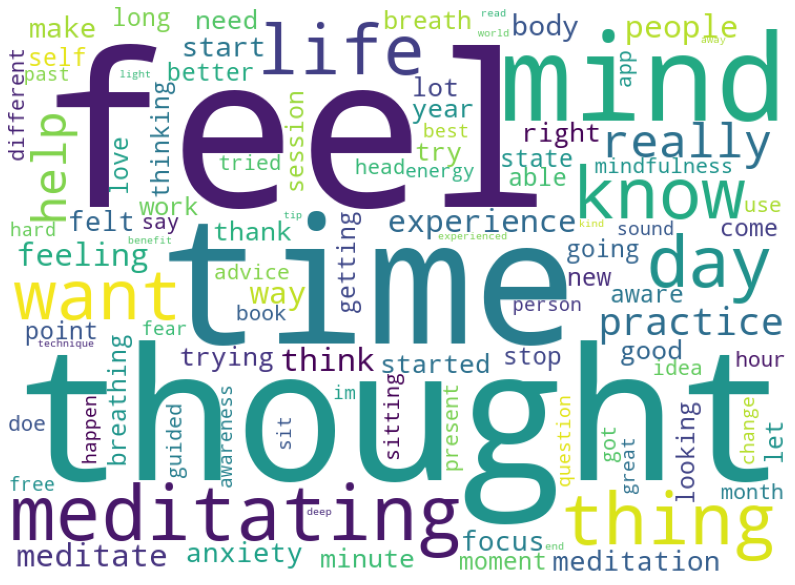

In [83]:
text = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for x in med.title_text_lem_stop: 
      
    # typecaste each val to string 
    x = str(x) 
  
    # split the value 
    values = x.split() 
      
    # Converts each token into lowercase 
    for i in range(len(values)): 
        values[i] = values[i].lower() 
          
    for words in values: 
        text = text + words + ' '
  
  
wc = WordCloud(max_words= 100,
                      width = 744, 
                      height = 544,
                      background_color ='white',
                      stopwords=stopwords, 
                      contour_width=3, 
                      contour_color='steelblue',
                      min_font_size = 10).generate(text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (14, 14)) 
plt.imshow(wc) 
plt.axis("off")
plt.savefig('resources/cloud.png')

### Exploring N-grams

In [84]:
# Create function to get top words
def plot_top_words(df, col, n, n_gram_range, title, palette='tab10'):
    def get_top_n_words(corpus, n=n, k=n_gram_range):     
        vec = CountVectorizer(ngram_range=(k,k), stop_words='english').fit(corpus)     
        bag_of_words = vec.transform(corpus)     
        sum_words = bag_of_words.sum(axis=0)      
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]    
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True) 
        return words_freq[:n]
    temp_df = pd.DataFrame(data=get_top_n_words(df[col], n), columns=['word','freq'])
    plt.figure(figsize=(10,6))
    sns.barplot(data=temp_df, y='word', x='freq', palette=palette)
    plt.ylabel('')
    plt.xlabel('')
    plt.title(title, fontsize=18)

In [85]:
yoga.head()

,subreddit,is_self,is_video,selftext,title,subreddit_id,created_utc,author,upvote_ratio,num_comments,selftext_stem,title_stem,selftext_lem,title_lem,selftext_lem_stop,title_lem_stop,title_text_lem_stop,title_len,selftext_len
3,yoga,True,False,I am super out of shape so I am 90% sure that ...,Extremely sore after my first hot vinyasa class,t5_2qhq6,1640903618,meggriffinsglasses,1.0,0,i am super out of shape so i am 90 sure that i...,extrem sore after my first hot vinyasa class,I am super out of shape so I am 90 sure that i...,Extremely sore after my first hot vinyasa class,I super shape I 90 sure issue I wanted know no...,Extremely sore hot vinyasa class,Extremely sore hot vinyasa class I super shape...,5,101
4,yoga,True,False,"Hello yogis, Anybody aware of interesting yoga...",Online new year's offerings?,t5_2qhq6,1640897639,Friendly_Popo,1.0,0,hello yogi anybodi awar of interest yoga offer...,onlin new year s offer,Hello yogi Anybody aware of interesting yoga o...,Online new year s offering,Hello yogi Anybody aware interesting offering ...,Online new year offering,Online new year offering Hello yogi Anybody aw...,4,47
6,yoga,True,False,Hi all. I was diagnosed with COVID last week a...,Yoga with COVID,t5_2qhq6,1640895222,dreamingofcupcakes,1.0,0,hi all i wa diagnos with covid last week and i...,yoga with covid,Hi all I wa diagnosed with COVID last week and...,Yoga with COVID,Hi I diagnosed COVID week really giving real b...,Yoga COVID,Yoga COVID Hi I diagnosed COVID week really gi...,2,46
10,yoga,True,False,I just came from a 75 minute class and I was s...,My heart is so full.,t5_2qhq6,1640885021,nachosmmm,1.0,0,i just came from a 75 minut class and i wa sob...,my heart is so full,I just came from a 75 minute class and I wa so...,My heart is so full,I came 75 minute class I sobbing end This teac...,My heart,My heart I came 75 minute class I sobbing end ...,2,97
11,yoga,True,False,"Okay, Down Dog app finally beat me. :) Transit...",Down Dog app - Star to Side Lunge,t5_2qhq6,1640878105,dave0814,1.0,0,okay down dog app final beat me transit from s...,down dog app star to side lung,Okay Down Dog app finally beat me Transitionin...,Down Dog app Star to Side Lunge,Okay Down Dog app finally beat Transitioning S...,Down Dog app Star Side Lunge,Down Dog app Star Side Lunge Okay Down Dog app...,6,20


#### Top words

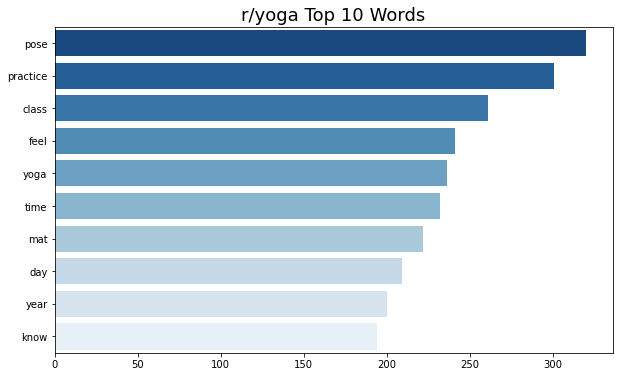

In [86]:
plot_top_words(yoga,'title_text_lem_stop', 10, 1, 'r/yoga Top 10 Words', 'Blues_r')

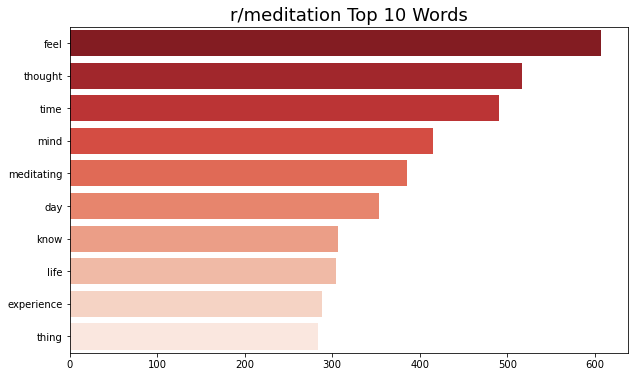

In [87]:
plot_top_words(med,'title_text_lem_stop', 10, 1, 'r/meditation Top 10 Words', 'Reds_r')

top words from r/yoga are pose, practice, class and also mat. I think the community likes to share on different poses. In terms of marketing, we can entice users by giving out free mats etc.
top words from r/meditation focuses on feeling, thoughts, mind etc. To promote yoga to this group, we need to incorporate mind empowerment as well.

#### Top bi-grams

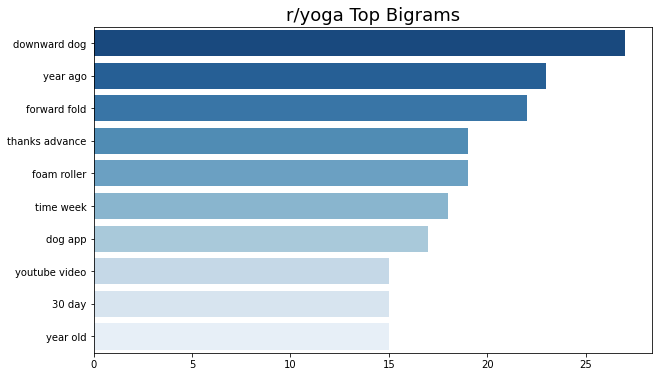

In [88]:
plot_top_words(yoga,'title_text_lem_stop', 10, 2, 'r/yoga Top Bigrams', palette='Blues_r')

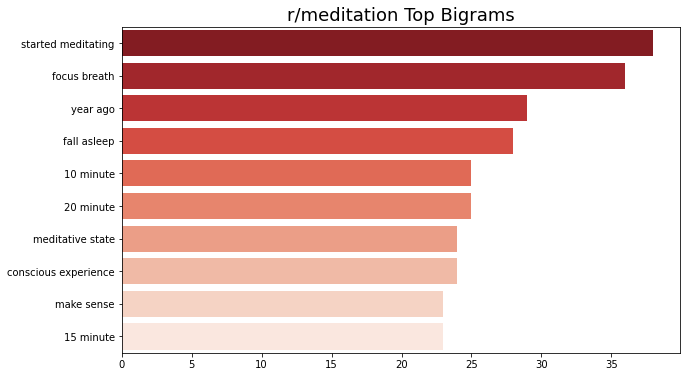

In [89]:
plot_top_words(med,'title_text_lem_stop', 10, 2, 'r/meditation Top Bigrams', palette='Reds_r')

top bigram for r/yoga are type of poses and tools like foam roller or video based tutorials from dog app or youtube. It could be an interesting selling point to promote packages with foam roller or kickstart virtual toga classes for people who are interested in yoga.

top bigram for r/meditation are breathing related, sleep improvement, and duration of meditation. This can be a good point to bring up as yoga also helps sleep quality and improve mind consciousness.

### Sentiment Analysis

In [90]:
#concatenate both datasets together
df = pd.concat([med, yoga]).reset_index (drop=True)

In [91]:
# Instantiate Sentiment Intensity Analyzer
sent = SentimentIntensityAnalyzer()

In [92]:
# Calculate sentiment of all the title and texts
df['scores']=df['title_text_lem_stop'].apply(sent.polarity_scores)

In [93]:
df.head()

,subreddit,is_self,is_video,selftext,title,subreddit_id,created_utc,author,upvote_ratio,num_comments,selftext_stem,title_stem,selftext_lem,title_lem,selftext_lem_stop,title_lem_stop,title_text_lem_stop,title_len,selftext_len,scores
0,Meditation,True,False,Now that I have burned all the past karma that...,Massive announcement concerning the future of ...,t5_2qnc9,1640907530,Extension_Mouse686,1.0,0,now that i have burn all the past karma that h...,massiv announc concern the futur of the human ...,Now that I have burned all the past karma that...,Massive announcement concerning the future of ...,Now I burned past karma weighing approximately...,Massive announcement concerning future human s...,Massive announcement concerning future human s...,18,345,"{'neg': 0.106, 'neu': 0.634, 'pos': 0.259, 'co..."
1,Meditation,True,False,I have been meditating for 220 consecutive day...,Meditation Technique to deal with the first mi...,t5_2qnc9,1640903751,hartmanners,1.0,0,i have been medit for 220 consecut day today i...,medit techniqu to deal with the first minut wi...,I have been meditating for 220 consecutive day...,Meditation Technique to deal with the first mi...,I meditating 220 consecutive day today I usual...,Meditation Technique deal minute noisy mind,Meditation Technique deal minute noisy mind I ...,6,138,"{'neg': 0.101, 'neu': 0.646, 'pos': 0.253, 'co..."
2,Meditation,True,False,I’ve tried to make meditation a part of my dai...,What should I focus on if I’m meditating witho...,t5_2qnc9,1640898514,v_philosoph,1.0,0,i ve tri to make medit a part of my daili habi...,what should i focu on if i m medit without a v...,I ve tried to make meditation a part of my dai...,What should I focus on if I m meditating witho...,I tried make daily habit stick I notice I use ...,What I focus I meditating video guide,What I focus I meditating video guide I tried ...,7,48,"{'neg': 0.0, 'neu': 0.878, 'pos': 0.122, 'comp..."
3,Meditation,True,False,I have periods during the day where my mind is...,"Racing mind, adhd?",t5_2qnc9,1640896254,chris152772272727829,1.0,0,i have period dure the day where my mind is ra...,race mind adhd,I have period during the day where my mind is ...,Racing mind adhd,I period day mind racing thought Is adhd Think...,Racing mind adhd,Racing mind adhd I period day mind racing thou...,3,18,"{'neg': 0.115, 'neu': 0.769, 'pos': 0.115, 'co..."
4,Meditation,True,False,I think I’ve been meditating correctly for a w...,Is there such a thing as “spiritual meditation...,t5_2qnc9,1640895782,OkStep3679,1.0,0,i think i ve been medit correctli for a while ...,is there such a thing as spiritu medit vs just...,I think I ve been meditating correctly for a w...,Is there such a thing a spiritual meditation v...,I think I meditating correctly consistent I su...,Is thing spiritual v,Is thing spiritual v I think I meditating corr...,4,39,"{'neg': 0.076, 'neu': 0.764, 'pos': 0.16, 'com..."


In [94]:
df['compound']=[x['compound'] for x in df['scores']]


In [95]:
df['compound_score']=['positive' if row>=0.05 else 'negative' if row <=-0.05 else 'neutral' for row in df['compound']]

In [96]:
df['compound'].groupby(df['subreddit']).mean()

subreddit
Meditation    0.359246
yoga          0.397104
Name: compound, dtype: float64

Both subreddit posts are reflecting positive sentiments on both yoga and meditation but slightly higher positive response on yoga.

In [97]:
df.head()

,subreddit,is_self,is_video,selftext,title,subreddit_id,created_utc,author,upvote_ratio,num_comments,...,selftext_lem,title_lem,selftext_lem_stop,title_lem_stop,title_text_lem_stop,title_len,selftext_len,scores,compound,compound_score
0,Meditation,True,False,Now that I have burned all the past karma that...,Massive announcement concerning the future of ...,t5_2qnc9,1640907530,Extension_Mouse686,1.0,0,...,Now that I have burned all the past karma that...,Massive announcement concerning the future of ...,Now I burned past karma weighing approximately...,Massive announcement concerning future human s...,Massive announcement concerning future human s...,18,345,"{'neg': 0.106, 'neu': 0.634, 'pos': 0.259, 'co...",0.9948,positive
1,Meditation,True,False,I have been meditating for 220 consecutive day...,Meditation Technique to deal with the first mi...,t5_2qnc9,1640903751,hartmanners,1.0,0,...,I have been meditating for 220 consecutive day...,Meditation Technique to deal with the first mi...,I meditating 220 consecutive day today I usual...,Meditation Technique deal minute noisy mind,Meditation Technique deal minute noisy mind I ...,6,138,"{'neg': 0.101, 'neu': 0.646, 'pos': 0.253, 'co...",0.9766,positive
2,Meditation,True,False,I’ve tried to make meditation a part of my dai...,What should I focus on if I’m meditating witho...,t5_2qnc9,1640898514,v_philosoph,1.0,0,...,I ve tried to make meditation a part of my dai...,What should I focus on if I m meditating witho...,I tried make daily habit stick I notice I use ...,What I focus I meditating video guide,What I focus I meditating video guide I tried ...,7,48,"{'neg': 0.0, 'neu': 0.878, 'pos': 0.122, 'comp...",0.6901,positive
3,Meditation,True,False,I have periods during the day where my mind is...,"Racing mind, adhd?",t5_2qnc9,1640896254,chris152772272727829,1.0,0,...,I have period during the day where my mind is ...,Racing mind adhd,I period day mind racing thought Is adhd Think...,Racing mind adhd,Racing mind adhd I period day mind racing thou...,3,18,"{'neg': 0.115, 'neu': 0.769, 'pos': 0.115, 'co...",0.0000,neutral
4,Meditation,True,False,I think I’ve been meditating correctly for a w...,Is there such a thing as “spiritual meditation...,t5_2qnc9,1640895782,OkStep3679,1.0,0,...,I think I ve been meditating correctly for a w...,Is there such a thing a spiritual meditation v...,I think I meditating correctly consistent I su...,Is thing spiritual v,Is thing spiritual v I think I meditating corr...,4,39,"{'neg': 0.076, 'neu': 0.764, 'pos': 0.16, 'com...",0.3400,positive


In [98]:
#map str response to number
df['is_yoga']=df['subreddit'].map({'Meditation':0, 'yoga':1})

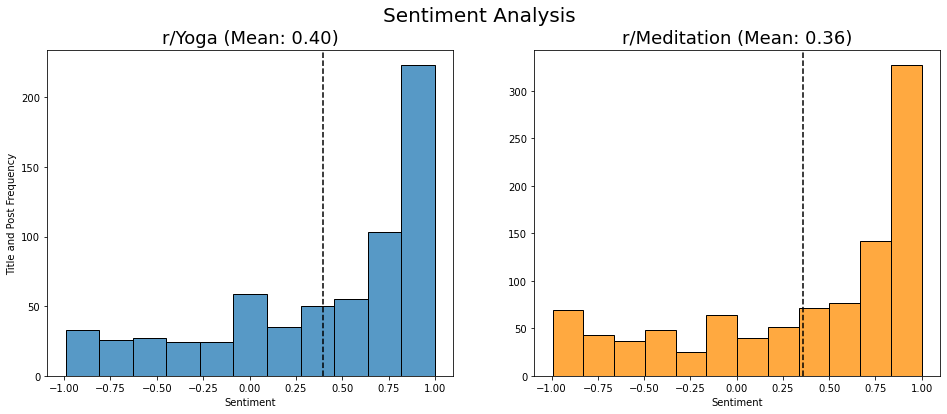

In [99]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax = ax.ravel()
sns.histplot(df[df['is_yoga'] == 1]['compound'].values, ax = ax[0])
sns.histplot(df[df['is_yoga'] == 0]['compound'].values, color='darkorange', ax = ax[1])
mean_1 = df[df['is_yoga'] == 1]['compound'].mean()
mean_2 = df[df['is_yoga'] == 0]['compound'].mean()
ax[0].set_title(f'r/Yoga (Mean: {(mean_1):.2f})', fontsize=18)
ax[1].set_title(f'r/Meditation (Mean: {(mean_2):.2f})', fontsize=18)
ax[0].axvline(mean_1, ls='--', color='black')
ax[1].axvline(mean_2, ls='--', color='black')
ax[0].set_xlabel('Sentiment')
ax[0].set_ylabel('Title and Post Frequency')
ax[1].set_xlabel('Sentiment')
ax[1].set_ylabel('')
plt.suptitle('Sentiment Analysis', fontsize=20);

The sentiment is mainly positive for both r/yoga and r/meditation with yoga slightly more positive which is a good motivation to promote new users to join. We also see higher number of title and post leaning towards positive sentiment as well which further strengthens the direction.

In [100]:
df.head()

,subreddit,is_self,is_video,selftext,title,subreddit_id,created_utc,author,upvote_ratio,num_comments,...,title_lem,selftext_lem_stop,title_lem_stop,title_text_lem_stop,title_len,selftext_len,scores,compound,compound_score,is_yoga
0,Meditation,True,False,Now that I have burned all the past karma that...,Massive announcement concerning the future of ...,t5_2qnc9,1640907530,Extension_Mouse686,1.0,0,...,Massive announcement concerning the future of ...,Now I burned past karma weighing approximately...,Massive announcement concerning future human s...,Massive announcement concerning future human s...,18,345,"{'neg': 0.106, 'neu': 0.634, 'pos': 0.259, 'co...",0.9948,positive,0
1,Meditation,True,False,I have been meditating for 220 consecutive day...,Meditation Technique to deal with the first mi...,t5_2qnc9,1640903751,hartmanners,1.0,0,...,Meditation Technique to deal with the first mi...,I meditating 220 consecutive day today I usual...,Meditation Technique deal minute noisy mind,Meditation Technique deal minute noisy mind I ...,6,138,"{'neg': 0.101, 'neu': 0.646, 'pos': 0.253, 'co...",0.9766,positive,0
2,Meditation,True,False,I’ve tried to make meditation a part of my dai...,What should I focus on if I’m meditating witho...,t5_2qnc9,1640898514,v_philosoph,1.0,0,...,What should I focus on if I m meditating witho...,I tried make daily habit stick I notice I use ...,What I focus I meditating video guide,What I focus I meditating video guide I tried ...,7,48,"{'neg': 0.0, 'neu': 0.878, 'pos': 0.122, 'comp...",0.6901,positive,0
3,Meditation,True,False,I have periods during the day where my mind is...,"Racing mind, adhd?",t5_2qnc9,1640896254,chris152772272727829,1.0,0,...,Racing mind adhd,I period day mind racing thought Is adhd Think...,Racing mind adhd,Racing mind adhd I period day mind racing thou...,3,18,"{'neg': 0.115, 'neu': 0.769, 'pos': 0.115, 'co...",0.0000,neutral,0
4,Meditation,True,False,I think I’ve been meditating correctly for a w...,Is there such a thing as “spiritual meditation...,t5_2qnc9,1640895782,OkStep3679,1.0,0,...,Is there such a thing a spiritual meditation v...,I think I meditating correctly consistent I su...,Is thing spiritual v,Is thing spiritual v I think I meditating corr...,4,39,"{'neg': 0.076, 'neu': 0.764, 'pos': 0.16, 'com...",0.3400,positive,0


### Sentiment Visualization with Scattertext

Scattertext can help visualize what words and phrases are more characteristic of a category than others. Below, we'll try to visualize sentiment across both subreddits and see what are the most 'positive' and 'negative' words.

Scattertext uses scaled f-score (the harmonic mean between precision and recall), which takes into account category-specific precision and term frequency when ranking words. A detailed explanation of the formula behind scaled f-score can be found here.

In this case, we'll be looking to compare positive and negative sentiment posts. While a word may appear frequently in either the negative or positive category, Scattertext can use scaled f-score to detect whether a particular term is more characteristic of a particular category.

In [101]:
#install spacy and scattertext in python before running if not will throwback error.

In [102]:
import spacy
import scattertext as st
from IPython.display import IFrame

In [103]:
nlp = spacy.load("en_core_web_sm")

In [104]:
# Build corpus for Scattertext sentiment analysis
corpus = st.CorpusFromPandas(df, category_col='compound_score', text_col='title_text_lem_stop', nlp=nlp).build()

In [105]:
df.head()

,subreddit,is_self,is_video,selftext,title,subreddit_id,created_utc,author,upvote_ratio,num_comments,...,title_lem,selftext_lem_stop,title_lem_stop,title_text_lem_stop,title_len,selftext_len,scores,compound,compound_score,is_yoga
0,Meditation,True,False,Now that I have burned all the past karma that...,Massive announcement concerning the future of ...,t5_2qnc9,1640907530,Extension_Mouse686,1.0,0,...,Massive announcement concerning the future of ...,Now I burned past karma weighing approximately...,Massive announcement concerning future human s...,Massive announcement concerning future human s...,18,345,"{'neg': 0.106, 'neu': 0.634, 'pos': 0.259, 'co...",0.9948,positive,0
1,Meditation,True,False,I have been meditating for 220 consecutive day...,Meditation Technique to deal with the first mi...,t5_2qnc9,1640903751,hartmanners,1.0,0,...,Meditation Technique to deal with the first mi...,I meditating 220 consecutive day today I usual...,Meditation Technique deal minute noisy mind,Meditation Technique deal minute noisy mind I ...,6,138,"{'neg': 0.101, 'neu': 0.646, 'pos': 0.253, 'co...",0.9766,positive,0
2,Meditation,True,False,I’ve tried to make meditation a part of my dai...,What should I focus on if I’m meditating witho...,t5_2qnc9,1640898514,v_philosoph,1.0,0,...,What should I focus on if I m meditating witho...,I tried make daily habit stick I notice I use ...,What I focus I meditating video guide,What I focus I meditating video guide I tried ...,7,48,"{'neg': 0.0, 'neu': 0.878, 'pos': 0.122, 'comp...",0.6901,positive,0
3,Meditation,True,False,I have periods during the day where my mind is...,"Racing mind, adhd?",t5_2qnc9,1640896254,chris152772272727829,1.0,0,...,Racing mind adhd,I period day mind racing thought Is adhd Think...,Racing mind adhd,Racing mind adhd I period day mind racing thou...,3,18,"{'neg': 0.115, 'neu': 0.769, 'pos': 0.115, 'co...",0.0000,neutral,0
4,Meditation,True,False,I think I’ve been meditating correctly for a w...,Is there such a thing as “spiritual meditation...,t5_2qnc9,1640895782,OkStep3679,1.0,0,...,Is there such a thing a spiritual meditation v...,I think I meditating correctly consistent I su...,Is thing spiritual v,Is thing spiritual v I think I meditating corr...,4,39,"{'neg': 0.076, 'neu': 0.764, 'pos': 0.16, 'com...",0.3400,positive,0


In [106]:
html = st.produce_scattertext_explorer(corpus, 
                                       category='positive', 
                                       category_name='positive', 
                                       not_category_name='negative',
                                       width_in_pixels=1000, 
                                       metadata=df['subreddit'],
                                       save_svg_button=True)

In [107]:
html_file_name = "Project_3_Yoga_Meditation_Sentiment_Analysis.html"
open(html_file_name, 'wb').write(html.encode('utf-8'))

1590253

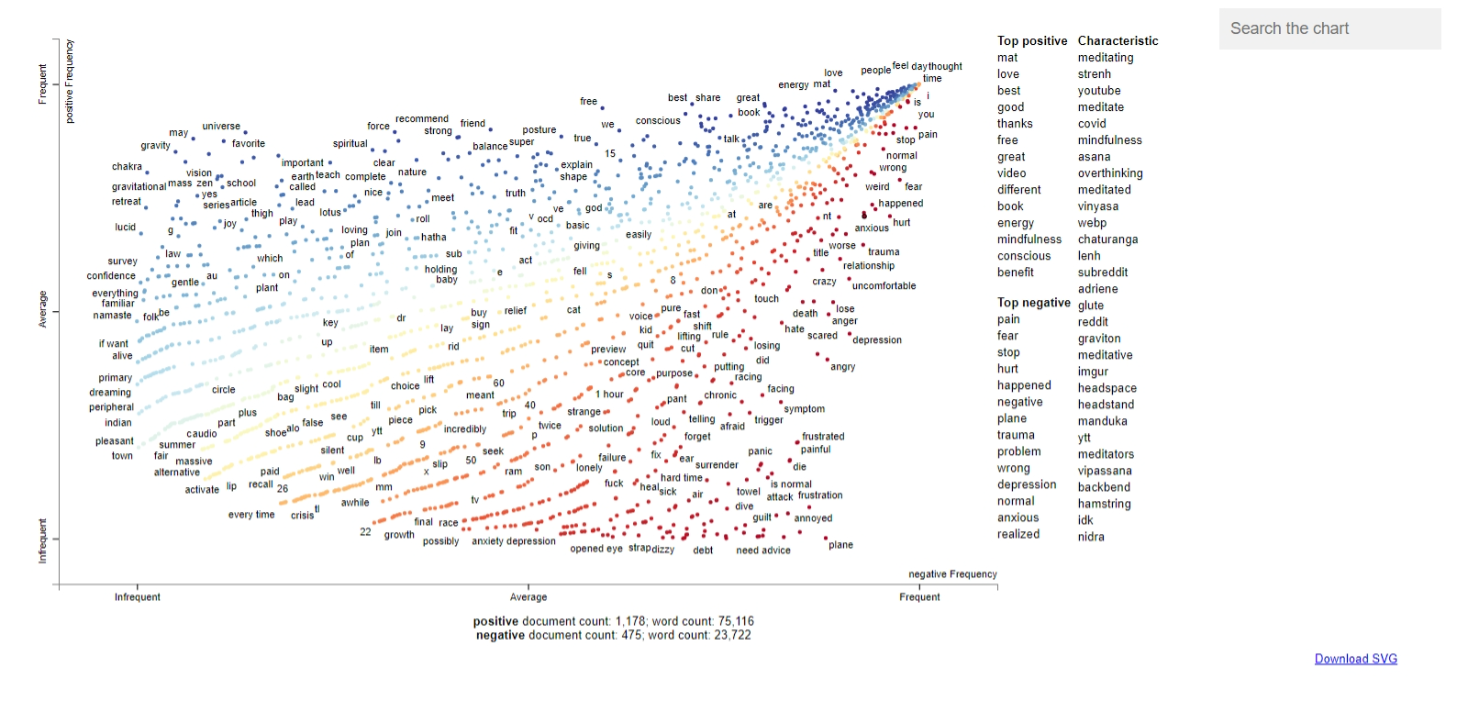

link to interactive scattertext plot:http://localhost:8888/view/DSIF-SG-3/project_3/Project_3_Yoga_Meditation_Sentiment_Analysis.html

The blue dots represent words that have been ranked as positive, while the red dots represent words that have been ranked as negative. As a general observation, the words in blue are used in both r/yoga and r/meditation but higher frequency in meditation because we have more posts and words in meditation. negative top words such as pain might come from r/yogawhich is indicative that some people are struggling to do the poses without instructor supervision. while top negative word fear come from meditation whereby some people experience fear when they are meditating and is trying to overcome it.


In [108]:
#save to file as csv
df.to_csv('data/df_cleaned.csv', index=False)